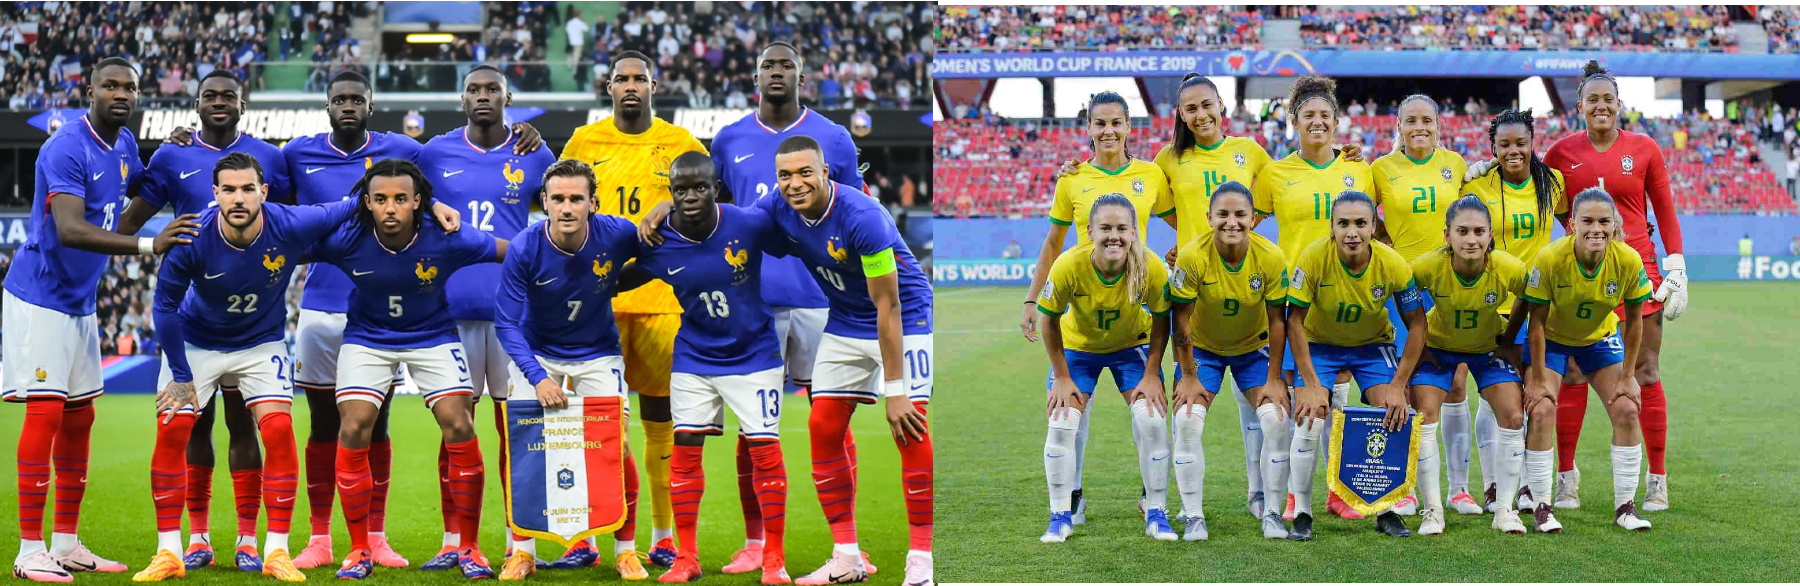

# Utilizando teste de hipótese para analisar se  são marcados mais gols em partidas internacionais de futebol feminino do que em partidas masculinas.

Serão utilizados 2 datasets, um contendo os resultados do times femininos e outro dos masculinos, contendo todas as partidas oficiais de futebol internacional masculino desde o século XIX e feminino desde o século XX

Só serão consideradas as partidas da FIFA World Cup e apartir da copa de 2002,
também será presumido que cada partida é independente logo, team form , que avalia o desempenho recente e o momento atual de uma equipe de futebol e se ela influencia o sucesso futuro será ignorado.

# Importância do teste de hipótese
Testes de hipóteses são importantes para confirmar intuições sobre observações usando embasamento estatístico. Caso uma matéria num site esportivo fosse feita sobre como o jornalista percebe que, no geral, o futebol feminino marca mais gols que o masculino, mas o autor da matéria escreve usando apenas seu achismo e o que ele observa como verdade, como ele pode garantir que o que ele escreve é verdadeiro?

Se ele escrever usando apenas sua percepção, ele pode estar errado e levar os leitores à desinformação e ser desmentido e prejudicar a sua reputação e a do site.

# Dicionário dos dados



*   date : Variável em formato de data, data em que a partida aconteceu
*   home_team: Time da casa
*   away_team: Time da fora
*   home_score: Variável numérica, gols do Time da casa
*   away_score: Variável numérica, gols do Time de fora
*   tournament: Tipo de competição












Para o teste de hipótese será utilizado um nivel de significância de 5%.
Hipóteses nula e alternativa:
* H0: A média de gols marcados em partidas internacionais de futebol feminino é a mesma que a do futebol masculino.
* H1: A média de gols marcados em partidas internacionais de futebol feminino é maior do que em partidas masculinas.

In [ ]:

#!pip install pingouin

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu,shapiro
from scipy.stats.distributions import norm
from statsmodels.graphics.gofplots import qqplot


women_games = pd.read_csv('/content/women_results.csv',index_col='date').sort_index().drop('Unnamed: 0',axis=1)
men_games = pd.read_csv('/content/men_results.csv',index_col='date').sort_index().drop('Unnamed: 0',axis=1)

In [ ]:
women_games.head()

,home_team,away_team,home_score,away_score,tournament
date,,,,,
1969-11-01,Italy,France,1,0,Euro
1969-11-01,Denmark,England,4,3,Euro
1969-11-02,England,France,2,0,Euro
1969-11-02,Italy,Denmark,3,1,Euro
1975-08-25,Thailand,Australia,3,2,AFC Championship


In [ ]:
men_games.head()

,home_team,away_team,home_score,away_score,tournament
date,,,,,
1872-11-30,Scotland,England,0,0,Friendly
1873-03-08,England,Scotland,4,2,Friendly
1874-03-07,Scotland,England,2,1,Friendly
1875-03-06,England,Scotland,2,2,Friendly
1876-03-04,Scotland,England,3,0,Friendly


 O dataset masculino possui muito mais registros, o que faz sentido já que o primeiro registro de partida no masculino é no ano de 1872 e no feminino em 1969

In [ ]:
print(women_games.shape[0])
print(men_games.shape[0])

4884
44353


 # Selecionando apenas as entradas da FIFA World Cup desde 01/01/2002

In [ ]:
women_games = women_games.loc['2002-01-01':]
women_games = women_games[women_games['tournament']=='FIFA World Cup']
print(women_games.shape[0])
print(women_games.head())

200
                home_team    away_team  home_score  away_score      tournament
date                                                                          
2003-09-20          Japan    Argentina           6           0  FIFA World Cup
2003-09-20        Germany       Canada           4           1  FIFA World Cup
2003-09-20        Nigeria  North Korea           0           3  FIFA World Cup
2003-09-20         Norway       France           2           0  FIFA World Cup
2003-09-21  United States       Sweden           3           1  FIFA World Cup


In [ ]:
men_games = men_games.loc['2002-01-01':]
men_games = men_games[men_games['tournament']=='FIFA World Cup']
print(men_games.shape[0])
print(men_games.head())

384
                      home_team     away_team  home_score  away_score  \
date                                                                    
2002-05-31               France       Senegal           0           1   
2002-06-01              Germany  Saudi Arabia           8           0   
2002-06-01  Republic of Ireland      Cameroon           1           1   
2002-06-01              Uruguay       Denmark           1           2   
2002-06-02            Argentina       Nigeria           1           0   

                tournament  
date                        
2002-05-31  FIFA World Cup  
2002-06-01  FIFA World Cup  
2002-06-01  FIFA World Cup  
2002-06-01  FIFA World Cup  
2002-06-02  FIFA World Cup  


# Unificando as colunas de gols

In [ ]:
women_games['goals']= women_games['home_score']+women_games['away_score']
men_games['goals']= men_games['home_score']+men_games['away_score']

In [ ]:
print(women_games[['home_score','away_score','goals']])

            home_score  away_score  goals
date                                     
2003-09-20           6           0      6
2003-09-20           4           1      5
2003-09-20           0           3      3
2003-09-20           2           0      2
2003-09-21           3           1      4
...                ...         ...    ...
2019-06-29           1           2      3
2019-07-02           1           2      3
2019-07-03           1           0      1
2019-07-06           1           2      3
2019-07-07           2           0      2

[200 rows x 3 columns]


In [ ]:
print(men_games[['home_score','away_score','goals']])

            home_score  away_score  goals
date                                     
2002-05-31           0           1      1
2002-06-01           8           0      8
2002-06-01           1           1      2
2002-06-01           1           2      3
2002-06-02           1           0      1
...                ...         ...    ...
2022-12-10           1           2      3
2022-12-13           3           0      3
2022-12-14           2           0      2
2022-12-17           2           1      3
2022-12-18           3           3      6

[384 rows x 3 columns]


# Análise gráfica da distribuição da média de gols

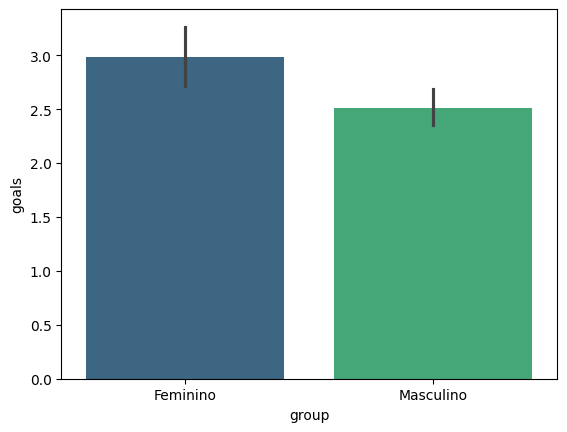

In [ ]:

women_games['group'] = 'Feminino'
men_games['group'] = 'Masculino'
df = pd.concat([women_games, men_games])

sns.barplot(data=df, y='goals', x='group',hue='group', palette='viridis')
plt.show()

Esse barplot da a entender que realmente há uma diferença nas médias de gols entre os times femininos e masculinos, e para verificar a validez disso será realizado teste de shapiro-walk

# Primeiramente analisar a distribuição dos dados, para decidir entre o uso de testes paramétricos ou não paramétricos para investigar a hipótese nula

Visualização da função densidade de probabilidade de gols

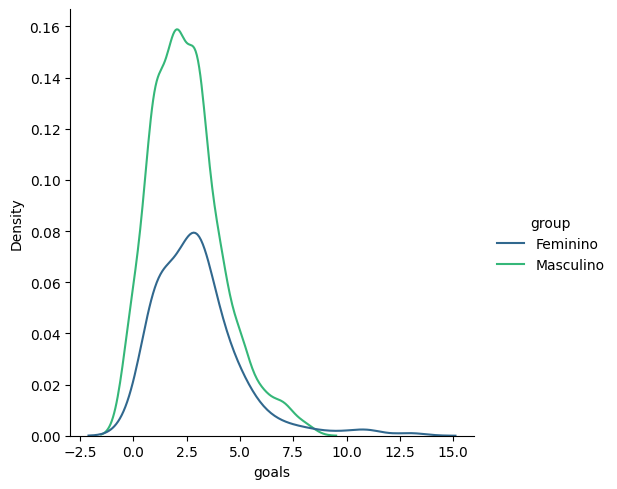

In [ ]:
sns.displot(data= df,x='goals',kind='kde',hue='group', palette='viridis')
plt.show()

A distribuição de observações de gols aparenta não seguir a distribuição normal, os dados são distribuídos assimetricamente

Visualizando gráfico Q-Q para para avaliar se os gols têm distribuição normal

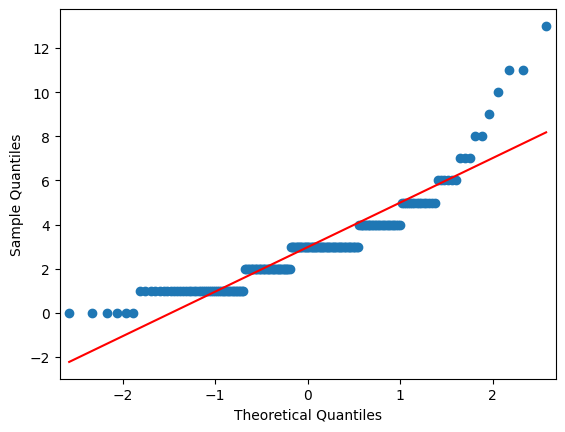

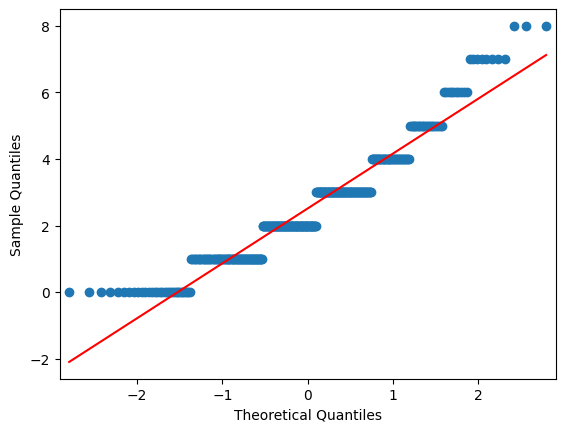

In [ ]:
qqplot(women_games['goals'],line='s',dist=norm,label='Feminino')
qqplot(men_games['goals'],line='s',dist=norm,label='Masculino')

plt.show()

Como os pontos no gráfico não se alinharam aproximadamente em uma linha reta, isso sugere que os gols não seguem a distribuição normal.

# Teste de shapiro-walk para avaliar a normalidade dos dados:

In [ ]:
alpha = 0.05
# dos times femininos
stat,p = shapiro(women_games['goals'])
print(f'p-value:{p }')
if p> alpha:
  print('Dados possuem distribuição normal')
else:
   print('Dados não possuem distribuição normal')
# dos times masculinos
stat,p = shapiro(men_games['goals'])
print(f'p-value:{p}')
if p> alpha:
  print('Dados possuem distribuição normal')
else:
   print('Dados não possuem distribuição normal')

p-value:3.8908293844627713e-13
Dados não possuem distribuição normal
p-value:8.894989197030093e-13
Dados não possuem distribuição normal


Então deve ser utilizado um teste não paramétrico para validar a hipótese nula

# Teste Wilcoxon mann whitney

In [ ]:
u_stat,p_val = mannwhitneyu(women_games['goals'],men_games['goals'],alternative='greater')
print(f'p-value no Mann-Whitney U teste {p_val}')

if p_val < alpha:
    print('A hipótese nula é rejeitada (Existe uma diferença significativa entre as pontuações de gols de homens e mulheres (p<0.1)')
else:

    print("A hipótese nula não pode ser rejeitada (Não há diferença significativa entre as pontuações de gols de homens e mulheres (p>0.05)).")

p-value no Mann-Whitney U teste 0.005106609825443641
A hipótese nula é rejeitada (Existe uma diferença significativa entre as pontuações de gols de homens e mulheres (p<0.1)


In [ ]:
# o mesmo teste mas realizado por outra biblioteca
pingouin.mwu(x=women_games['goals'],y=men_games['goals'],alternative ='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,0.126901,0.563451


# Conclusão
Com uma probabilidade de 5% de cometer um erro do tipo I e rejeitar a hipótese nula quando ela é verdadeira. A conclusão do Teste U de Mann-Whitney, com p-value menor que o alpha, é de que há uma diferença significativa entre as médias de gols de times femininos e masculinos para as partidas da FIFA World Cup a partir do ano 2002.

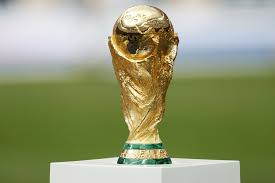